# <a id='0'>Content</a>
- <a href='#1'>Load packages</a>
- <a href='#2'>How is Chronic Kidney Disease (CKD) diagnosed?</a>
- <a href='#3'>Variable Information</a>
- <a href='#4'>Exploratory Data Analysis</a>
    - <a href='#41'>Find number of patients</a> 
    - <a href='#42'>Age Boxplot</a> 
- <a href='#4'>Balance Dataset</a>
    - <a href='#41'>Imbalanced Data</a>
    - <a href='#42'>Applying SMOTE</a> 
- <a href='#5'>Models</a>
    - <a href='#51'>Split Dataset into Train/Test</a>
    - <a href='#52'>Logistic Regression</a>
    - <a href='#53'>Naive Bayes</a>
    - <a href='#54'>Decision Tree</a>
    - <a href='#55'>Random Forest</a>
- <a href='#6'>Plot ROC</a>
- <a href='#7'>Inspect Dollar Amount Loss</a>
    - <a href='#71'>Type 1 and Type 2 Error</a>

- <a href='#8'>Conclusion</a>

# <a id="1"> Load Packages </a> 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
kidney_disease_medical_data = pd.read_csv('kidney_disease.csv')

In [159]:
kidney_disease_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [160]:
kidney_disease_medical_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [162]:
label_enc.fit_transform(['yes', 'no'])

array([1, 0])

# <a id="3">Variable Information</a>
https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease#
- age - age
- bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - hemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia
- class - class

# <a id="2">How is Chronic Kidney Disease (CKD) diagnosed?</a> 
Source - https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/diagnosis-treatment/drc-20354527
- Blood tests. 
    - Kidney function tests look for the level of waste products, such as creatinine and urea, in your blood.
- Urine tests. 
    - Analyzing a sample of your urine can reveal abnormalities that point to chronic kidney failure and help identify the cause of chronic kidney disease.
- Imaging tests. 
    - Your doctor might use ultrasound to assess your kidneys' structure and size. Other imaging tests might be used in some cases.
- Removing a sample of kidney tissue for testing

# <a id='4'>Exploratory Data Analysis</a>
- <a href='#41'>Find number of patients</a>
- <a href='#42'>Age Boxplot</a> 
- How many patients have ckd and check for imbalance
- Determine a threshold for creatinine levels and ckd in patients
- Calculate BUN (blood urea nitrogren) to creatinine ratio and confirm if a low bun to creatinine ratio results in ckd or not

## <a id='41'>How many patients</a>

In [163]:
# number of patients
kidney_disease_medical_data['id'].nunique()

400

##  <a id='42'>Explore Age Range</a>

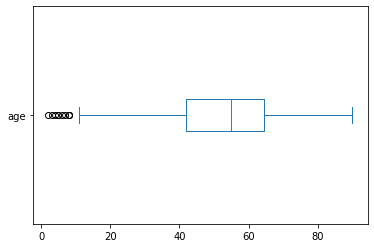

In [164]:
# plot boxplot for age range
kidney_disease_medical_data['age'].plot(kind='box', vert=False)

In [165]:
# data entry issue: ckd\t
kidney_disease_medical_data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [166]:
# clean ckd\t
kidney_disease_medical_data.replace('ckd\t', 'ckd', inplace=True)

kidney_disease_medical_data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [167]:
# where classification = ckd
condition_1 = kidney_disease_medical_data['classification'] == 'ckd'

In [168]:
# where classification = notckd
condition_2 = kidney_disease_medical_data['classification'] == 'notckd'

Text(0.5, 0, 'Serum Creatinine Level')

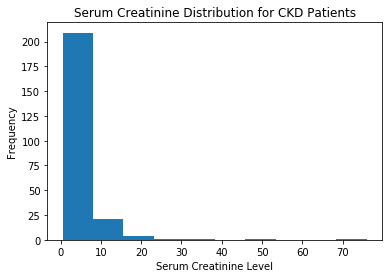

In [169]:
kidney_disease_medical_data[condition_1]['sc'].plot(kind='hist')
plt.title('Serum Creatinine Distribution for CKD Patients')
plt.xlabel('Serum Creatinine Level')

Text(0.5, 0, 'Serum Creatinine Level')

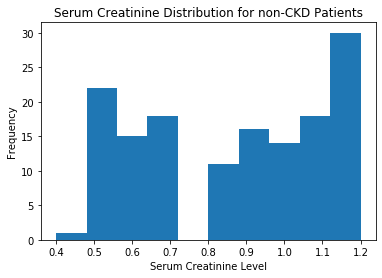

In [170]:
kidney_disease_medical_data[condition_2]['sc'].plot(kind='hist')
plt.title('Serum Creatinine Distribution for non-CKD Patients')
plt.xlabel('Serum Creatinine Level')

In [171]:
# descriptive stats for non-ckd patients and their serum creatinine levels
kidney_disease_medical_data[condition_2]['sc'].describe()

count    145.000000
mean       0.868966
std        0.255092
min        0.400000
25%        0.600000
50%        0.900000
75%        1.100000
max        1.200000
Name: sc, dtype: float64

In [172]:
# descriptive stats for ckd patients and their serum creatinine levels
# safe to say anyone with a serum creatinine level > 1.4 is at risk of having ckd
kidney_disease_medical_data[condition_1]['sc'].describe()

count    238.000000
mean       4.414916
std        6.950275
min        0.500000
25%        1.425000
50%        2.250000
75%        4.550000
max       76.000000
Name: sc, dtype: float64

In [173]:
# calculate bun to creatinine ratio
kidney_disease_medical_data['blood_urea_creatinine_ratio'] = kidney_disease_medical_data.apply(lambda x: x.bu/x.sc, axis=1)

In [174]:
# over 80% of patients with a blood urea creatinine ratio less than 80 have ckd
kidney_disease_medical_data[kidney_disease_medical_data['blood_urea_creatinine_ratio']<20]['classification'].value_counts(normalize=True)


ckd       0.828829
notckd    0.171171
Name: classification, dtype: float64

In [175]:
# pretty even - high bun-creatinine ratio could be due to dehydration not ckd
# https://drinkmagnak.com/the-bun-creatinine-ratio-understanding-biomarkers-of-hydration-and-kidney-function/
kidney_disease_medical_data[kidney_disease_medical_data['blood_urea_creatinine_ratio']>20]['classification'].value_counts(normalize=True)


ckd       0.532567
notckd    0.467433
Name: classification, dtype: float64

In [176]:
kidney_disease_medical_data.describe(include='object')

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,2
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,250


## <a id='41'>Missing Data</a> 

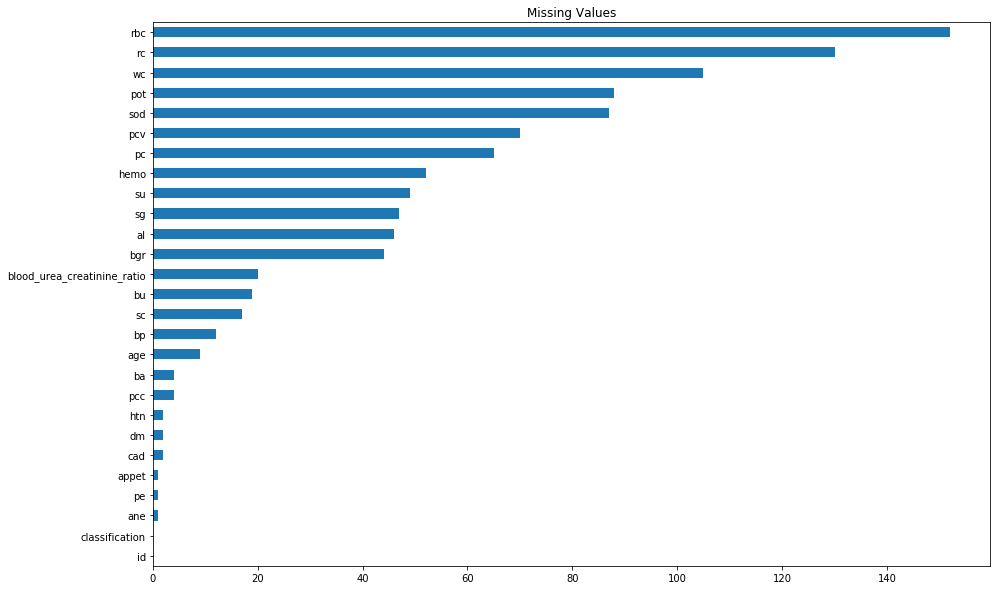

In [178]:
kidney_disease_medical_data.isna().sum().sort_values(ascending=True).plot(kind='barh', figsize=(15,10), title='Missing Values')

In [179]:
for c in kidney_disease_medical_data.select_dtypes('object').columns:
    print(f"---- {c} ---")
    print(kidney_disease_medical_data[c].unique())

---- rbc ---
[nan 'normal' 'abnormal']
---- pc ---
['normal' 'abnormal' nan]
---- pcc ---
['notpresent' 'present' nan]
---- ba ---
['notpresent' 'present' nan]
---- pcv ---
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
---- wc ---
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900'

In [180]:
kidney_disease_medical_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,blood_urea_creatinine_ratio
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,380.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,30.264595
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,17.853089
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.205479
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,18.688406
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,25.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,37.398990
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,100.000000


In [181]:
# clean tab data
kidney_disease_medical_data = kidney_disease_medical_data.replace(r'\t', '', regex=True)

In [182]:
# replace ? with 0

kidney_disease_medical_data = kidney_disease_medical_data.replace('?', '0')

In [183]:
for c in kidney_disease_medical_data.select_dtypes('object').columns:
    print(f"---- {c} ---")
    print(kidney_disease_medical_data[c].unique())

---- rbc ---
[nan 'normal' 'abnormal']
---- pc ---
['normal' 'abnormal' nan]
---- pcc ---
['notpresent' 'present' nan]
---- ba ---
['notpresent' 'present' nan]
---- pcv ---
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '0' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
---- wc ---
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '0' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100'

In [184]:
# convert pcv, wc and rc into float
kidney_disease_medical_data[['pcv', 'wc', 'rc']] = kidney_disease_medical_data[['pcv', 'wc', 'rc']].astype(float)

In [185]:
kidney_disease_medical_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,blood_urea_creatinine_ratio
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,330.000000,295.000000,270.000000,380.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.766667,8377.627119,4.690000,30.264595
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.228118,2979.928513,1.062758,17.853089
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.205479
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,18.688406
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,25.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,37.398990
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,100.000000


In [186]:
kidney_disease_medical_data.describe(include='object')

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,398,398,398,399,399,399,400
unique,2,2,2,2,2,3,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,354,374,251,261,364,317,323,339,250


In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

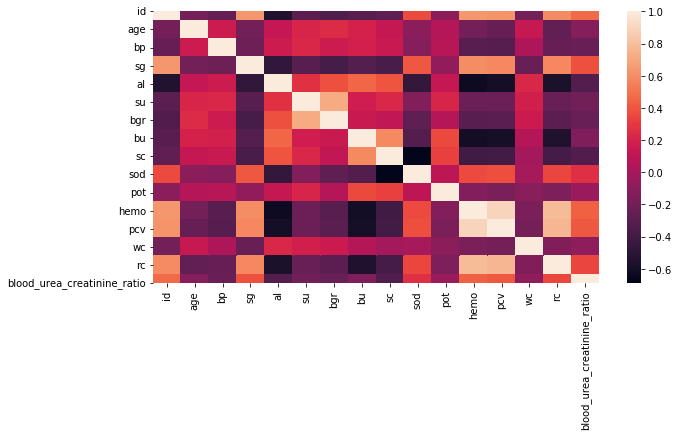

In [188]:
# diabetes - secondary cause
# hypertension (high blood pressure) - 2nd most common cause 
# coronary - pump blood to heart so if there is junk that can cause heart disease or cardiac arrest
# ckd - end stage renal disease (kidney not functioning need dialysis)
plt.figure(figsize=(10, 5))
sns.heatmap(kidney_disease_medical_data.corr())

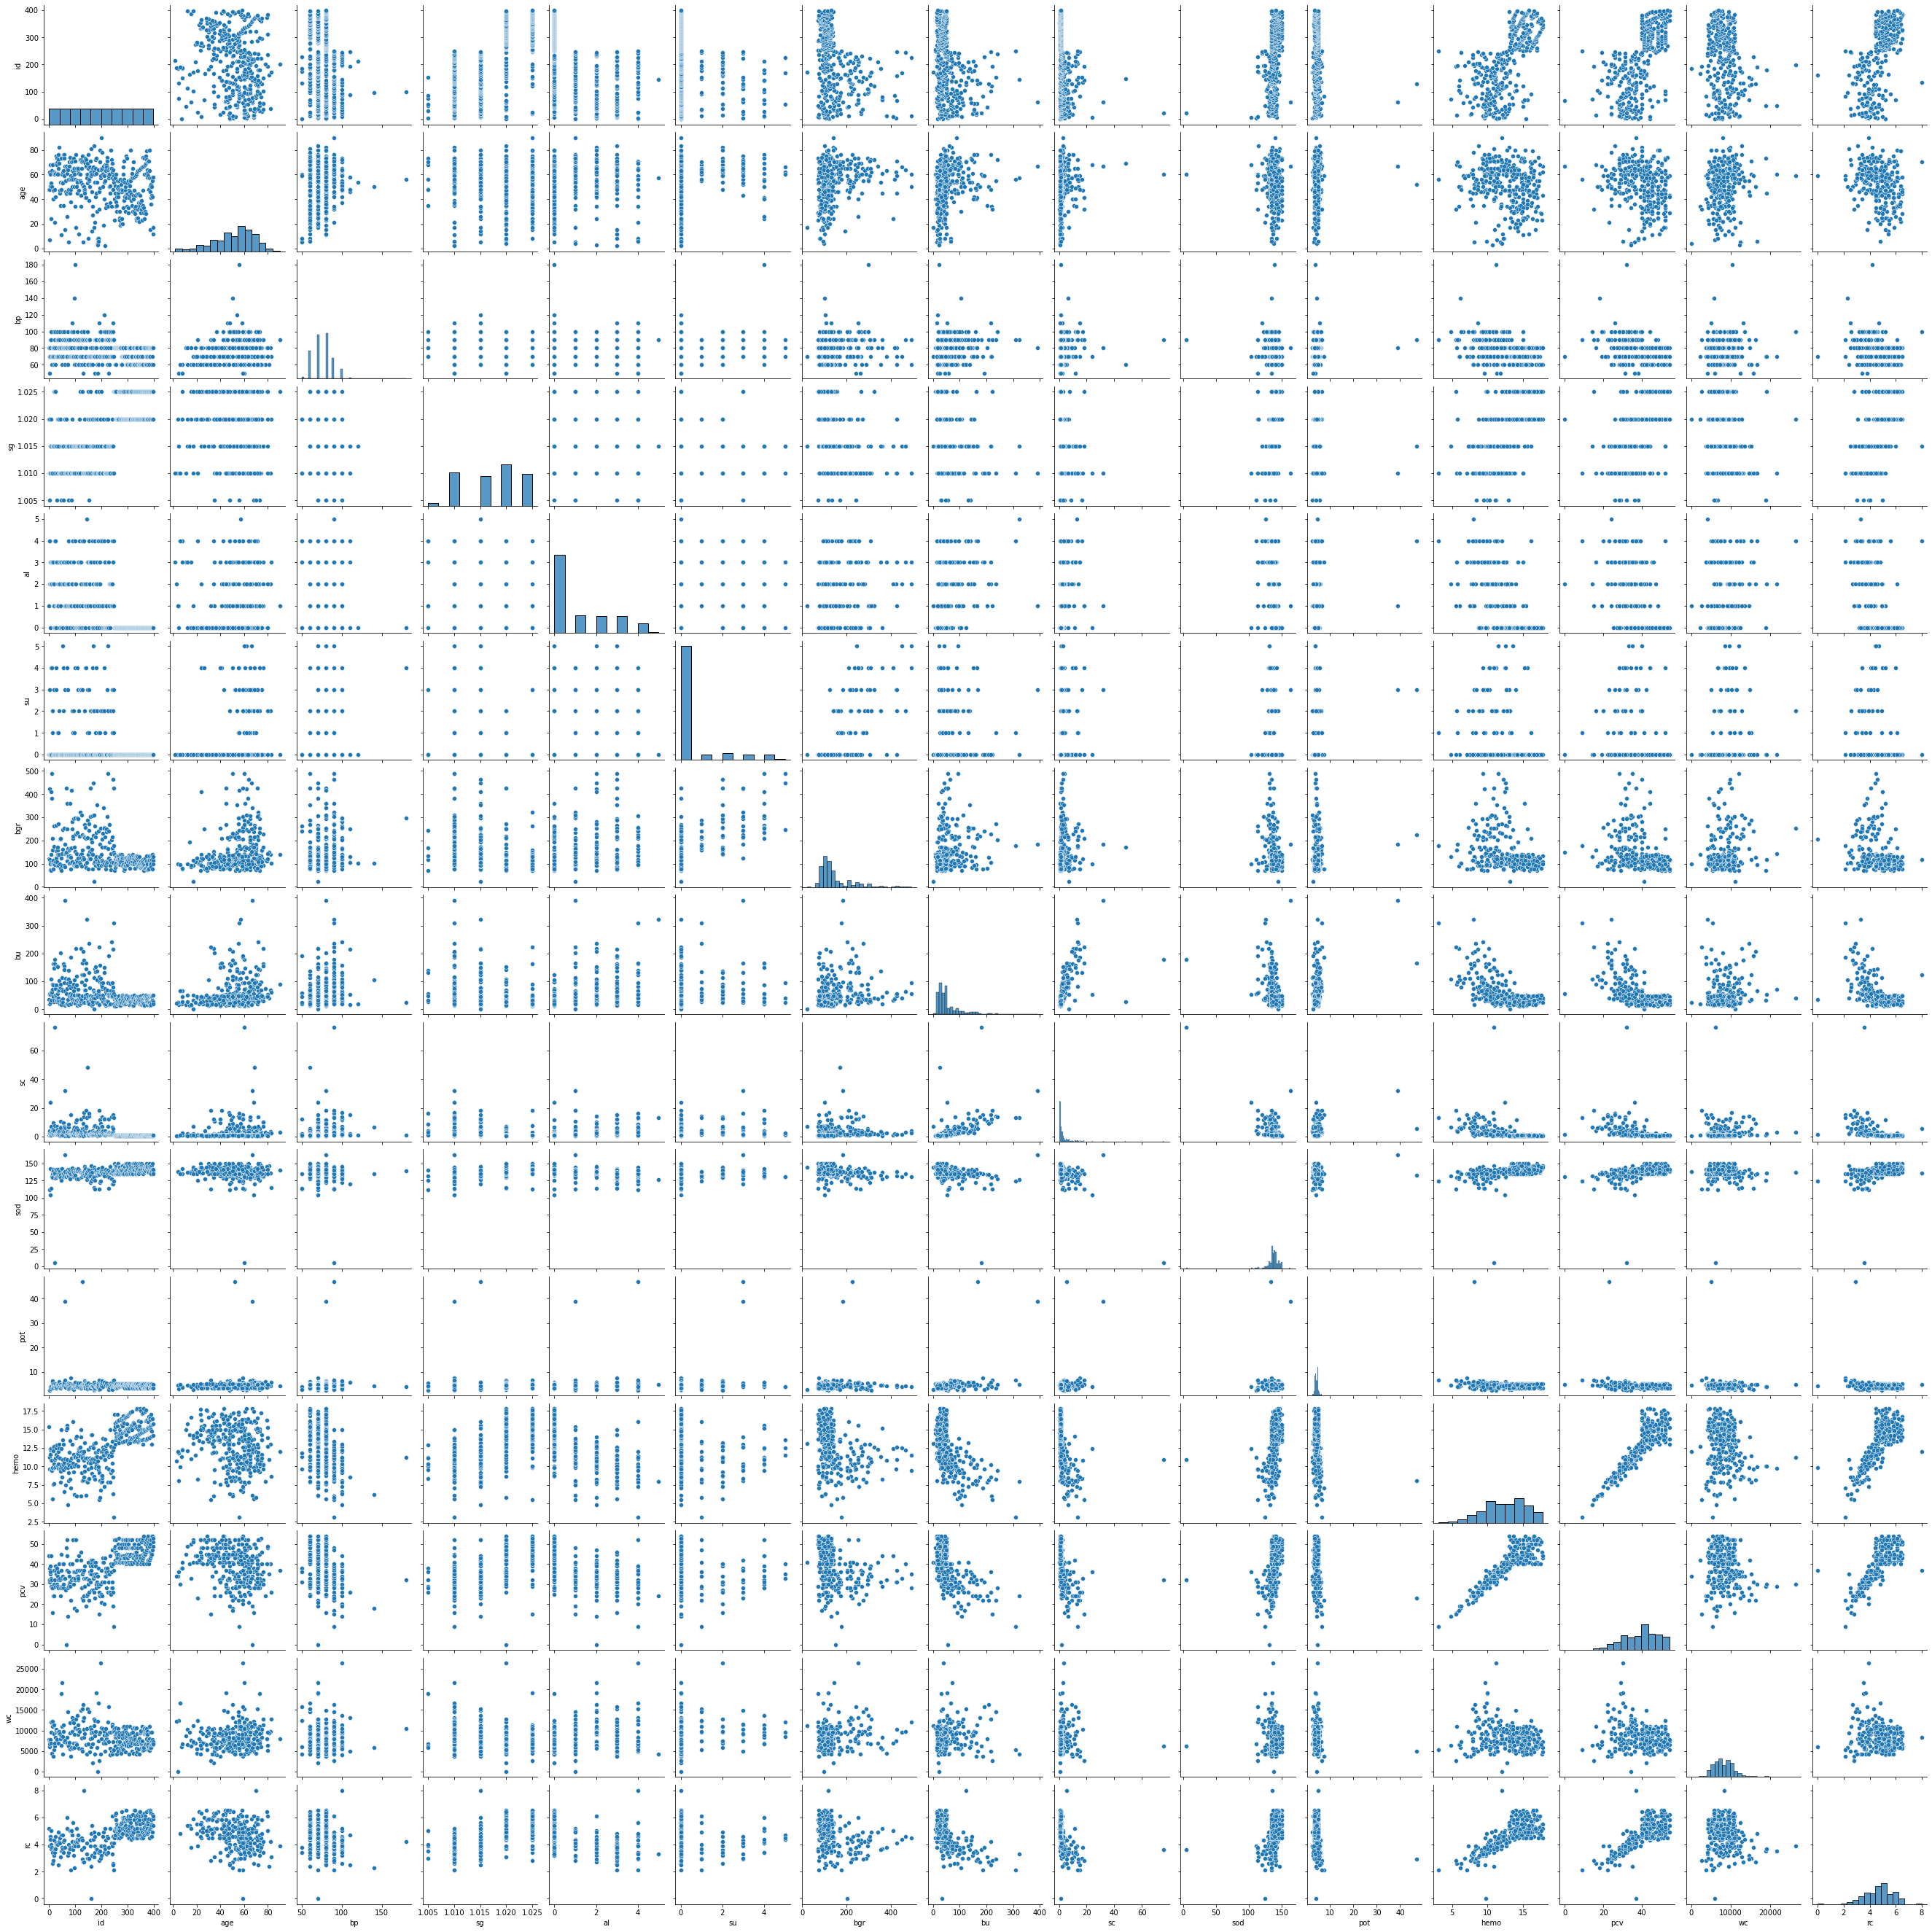

In [40]:
sns.pairplot(kidney_disease_medical_data)

In [28]:
kidney_disease_medical_data.isna().sum().to_frame('num_missing_vals')

,num_missing_vals
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [29]:
kidney_disease_medical_data['dm'].value_counts()

no      261
yes     136
 yes      1
Name: dm, dtype: int64

In [30]:
# remove space
kidney_disease_medical_data['dm'] = kidney_disease_medical_data['dm'].str.strip()

In [31]:
kidney_disease_medical_data['dm'].value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [32]:
kidney_disease_medical_data['dm_1_0'] = np.where(kidney_disease_medical_data['dm']=='yes', 1, 0)

In [33]:
kidney_disease_medical_data['ckd_or_not'] = np.where(kidney_disease_medical_data['classification']=='ckd', 1, 0)

In [34]:
kidney_disease_medical_data['count'] = 1

In [35]:
pd.pivot_table(kidney_disease_medical_data, values='count', index='dm_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0)

ckd_or_not,0,1
dm_1_0,,
0,150,113
1,0,137


# Patients with diabetes have ckd
- Patients with diabetes have a 34% chance of having ckd
- Patients with hypertension have a 37% chance of having ckd

In [48]:
137/pd.pivot_table(kidney_disease_medical_data, values='count', index='dm_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0).sum().sum()

0.3425

In [49]:
kidney_disease_medical_data['htn_1_0'] = np.where(kidney_disease_medical_data['htn']=='yes', 1, 0)

In [51]:
147/pd.pivot_table(kidney_disease_medical_data, values='count', index='htn_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0).sum().sum()

0.3675

# What is the likelihood someone has coronary artery disease if they have ckd? 
- 8.5% chance of someone having CAD if they have CKD

In [102]:
kidney_disease_medical_data['cad_1_0'] = np.where(kidney_disease_medical_data['cad']=='yes', 1, 0)

In [103]:
pd.pivot_table(kidney_disease_medical_data, values='count', index='cad_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0)

ckd_or_not,0,1
cad_1_0,,
0,150,216
1,0,34


In [64]:
34/400

0.085

In [66]:
kidney_disease_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    float64
 17  wc              295 non-null    flo

In [52]:
# columns to train model on 
X_features = ['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']

In [53]:
kidney_disease_medical_data[X_features].select_dtypes('object')

,rbc,cad,appet,htn,dm,ane,pe
0,NaN,no,good,yes,yes,no,no
1,NaN,no,good,no,no,no,no
2,normal,no,poor,no,yes,yes,no
3,normal,no,poor,yes,no,yes,yes
4,normal,no,good,no,no,no,no
...,...,...,...,...,...,...,...
395,normal,no,good,no,no,no,no
396,normal,no,good,no,no,no,no
397,normal,no,good,no,no,no,no
398,normal,no,good,no,no,no,no


In [134]:
kidney_disease_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           400 non-null    int64  
 1   age                          400 non-null    float64
 2   bp                           400 non-null    float64
 3   sg                           353 non-null    float64
 4   al                           354 non-null    float64
 5   su                           351 non-null    float64
 6   rbc                          400 non-null    object 
 7   pc                           335 non-null    object 
 8   pcc                          396 non-null    object 
 9   ba                           396 non-null    object 
 10  bgr                          356 non-null    float64
 11  bu                           381 non-null    float64
 12  sc                           400 non-null    float64
 13  sod                 

In [54]:
kidney_disease_medical_data[X_features].select_dtypes(exclude='object').fillna(0)

,bp,rc,wc,pcv,sc,sod,pot,hemo,age
0,80.0,5.2,7800.0,44.0,1.2,0.0,0.0,15.4,48.0
1,50.0,0.0,6000.0,38.0,0.8,0.0,0.0,11.3,7.0
2,80.0,0.0,7500.0,31.0,1.8,0.0,0.0,9.6,62.0
3,70.0,3.9,6700.0,32.0,3.8,111.0,2.5,11.2,48.0
4,80.0,4.6,7300.0,35.0,1.4,0.0,0.0,11.6,51.0
...,...,...,...,...,...,...,...,...,...
395,80.0,4.9,6700.0,47.0,0.5,150.0,4.9,15.7,55.0
396,70.0,6.2,7800.0,54.0,1.2,141.0,3.5,16.5,42.0
397,80.0,5.4,6600.0,49.0,0.6,137.0,4.4,15.8,12.0
398,60.0,5.9,7200.0,51.0,1.0,135.0,4.9,14.2,17.0


In [55]:
# fill na with mean depending on column
def replaceNAWithMean(df, column):
    df[column] = df[column].fillna(df[column].mean())

In [56]:
def replaceNAWithMode(df, column):
    df[column] = df[column].fillna(df[column].mode()[0])

In [189]:
for col in kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].select_dtypes(exclude='object').columns:
    replaceNAWithMean(kidney_disease_medical_data, col)

In [190]:
for col in kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].select_dtypes('object').columns:
    replaceNAWithMode(kidney_disease_medical_data, col)

In [59]:
kidney_disease_medical_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad,appet,pe,ane,classification,blood_urea_creatinine_ratio,dm_1_0,ckd_or_not,count,htn_1_0
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,ckd,30.000000,1,1,1,1
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,ckd,22.500000,0,1,1,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,no,poor,no,yes,ckd,29.444444,1,1,1,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,no,poor,yes,yes,ckd,14.736842,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,ckd,18.571429,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,notckd,98.000000,0,0,1,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,notckd,25.833333,0,0,1,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,notckd,43.333333,0,0,1,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,notckd,50.000000,0,0,1,0


In [60]:
# check for missing data
kidney_disease_medical_data[X_features].isna().sum()

bp       0
rbc      0
rc       0
wc       0
pcv      0
cad      0
appet    0
sc       0
sod      0
pot      0
hemo     0
htn      0
dm       0
ane      0
age      0
pe       0
dtype: int64

In [191]:
kidney_training_data = kidney_disease_medical_data[X_features]

In [62]:
kidney_training_data.select_dtypes('object').columns

Index(['rbc', 'cad', 'appet', 'htn', 'dm', 'ane', 'pe'], dtype='object')

In [118]:
del kidney_training_data_final

In [139]:
kidney_training_data

,bp,rbc,rc,wc,pcv,cad,appet,sc,sod,pot,hemo,htn,dm,ane,age,pe
0,80.0,normal,5.20,7800.0,44.0,no,good,1.2,137.528754,4.627244,15.4,yes,yes,no,48.0,no
1,50.0,normal,4.69,6000.0,38.0,no,good,0.8,137.528754,4.627244,11.3,no,no,no,7.0,no
2,80.0,normal,4.69,7500.0,31.0,no,poor,1.8,137.528754,4.627244,9.6,no,yes,yes,62.0,no
3,70.0,normal,3.90,6700.0,32.0,no,poor,3.8,111.000000,2.500000,11.2,yes,no,yes,48.0,yes
4,80.0,normal,4.60,7300.0,35.0,no,good,1.4,137.528754,4.627244,11.6,no,no,no,51.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,normal,4.90,6700.0,47.0,no,good,0.5,150.000000,4.900000,15.7,no,no,no,55.0,no
396,70.0,normal,6.20,7800.0,54.0,no,good,1.2,141.000000,3.500000,16.5,no,no,no,42.0,no
397,80.0,normal,5.40,6600.0,49.0,no,good,0.6,137.000000,4.400000,15.8,no,no,no,12.0,no
398,60.0,normal,5.90,7200.0,51.0,no,good,1.0,135.000000,4.900000,14.2,no,no,no,17.0,no


In [262]:
X = kidney_training_data
y = kidney_disease_medical_data['classification']

In [204]:
X = pd.get_dummies(kidney_training_data, drop_first=True, columns=['rbc', 'cad', 'appet', 'htn', 'dm', 'ane', 'pe'])
y = kidney_disease_medical_data['classification']

In [236]:
X.drop(columns='dm_no', inplace=True)

In [237]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bp          400 non-null    float64
 1   rc          400 non-null    float64
 2   wc          400 non-null    float64
 3   pcv         400 non-null    float64
 4   sc          400 non-null    float64
 5   sod         400 non-null    float64
 6   pot         400 non-null    float64
 7   hemo        400 non-null    float64
 8   age         400 non-null    float64
 9   rbc_normal  400 non-null    uint8  
 10  cad_yes     400 non-null    uint8  
 11  appet_poor  400 non-null    uint8  
 12  htn_yes     400 non-null    uint8  
 13  dm_yes      400 non-null    uint8  
 14  ane_yes     400 non-null    uint8  
 15  pe_yes      400 non-null    uint8  
dtypes: float64(9), uint8(7)
memory usage: 31.0 KB


In [202]:
X.iloc[:, 9:]

,rbc_normal,cad_yes,appet_poor,htn_yes,dm_no,dm_yes,ane_yes,pe_yes
0,1,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,1,1,0,1,1
4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
395,1,0,0,0,1,0,0,0
396,1,0,0,0,1,0,0,0
397,1,0,0,0,1,0,0,0
398,1,0,0,0,1,0,0,0


In [224]:
X_train.iloc[:, 9:]

,rbc_normal,cad_yes,appet_poor,htn_yes,dm_no,dm_yes,ane_yes,pe_yes
157,1,0,0,1,0,1,0,0
109,1,0,0,0,0,1,0,0
17,1,0,1,1,1,0,0,0
347,1,0,0,0,1,0,0,0
24,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...
71,1,0,0,1,0,1,0,0
106,1,0,0,1,0,1,1,1
270,1,0,0,0,1,0,0,0
348,1,0,0,0,1,0,0,0


In [226]:
kidney_training_data.iloc[157, ]

bp         70.0
rbc      normal
rc          3.9
wc       7900.0
pcv        39.0
cad          no
appet      good
sc          1.7
sod       136.0
pot         4.7
hemo       12.6
htn         yes
dm          yes
ane          no
age        62.0
pe           no
Name: 157, dtype: object

In [227]:
dt_predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [260]:
kidney_disease_medical_data['bp']

0      80.0
1      50.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: bp, Length: 400, dtype: float64

In [223]:
y_test

209       ckd
280    notckd
33        ckd
210       ckd
93        ckd
        ...  
60        ckd
79        ckd
285    notckd
305    notckd
281    notckd
Name: classification, Length: 120, dtype: object

In [220]:
kidney_disease_medical_data['rbc']

0      normal
1      normal
2      normal
3      normal
4      normal
        ...  
395    normal
396    normal
397    normal
398    normal
399    normal
Name: rbc, Length: 400, dtype: object

In [198]:
label_enc.fit_transform(['normal'])

array([0])

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
label_enc = LabelEncoder()

In [255]:
y = label_enc.fit_transform(y)

In [67]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [68]:
kidney_disease_medical_data['classification']

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [69]:
kidney_disease_medical_data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
import seaborn as sns

In [74]:
log_reg = LogisticRegression(max_iter=1000)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [232]:
from imblearn.over_sampling import SMOTE

In [233]:
sm = SMOTE()

In [234]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [239]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [240]:
X_test.columns

Index(['bp', 'rc', 'wc', 'pcv', 'sc', 'sod', 'pot', 'hemo', 'age',
       'rbc_normal', 'cad_yes', 'appet_poor', 'htn_yes', 'dm_yes', 'ane_yes',
       'pe_yes'],
      dtype='object')

In [138]:
X_test

,bp,rc,wc,pcv,sc,sod,pot,hemo,age,rbc_abnormal,...,appet_good,appet_poor,htn_no,htn_yes,dm_no,dm_yes,ane_no,ane_yes,pe_no,pe_yes
209,70.0,4.69,6900.000000,38.766667,3.072454,137.528754,4.627244,11.500000,19.0,0,...,1,0,1,0,1,0,1,0,1,0
280,80.0,5.20,8100.000000,52.000000,0.900000,144.000000,4.500000,13.300000,47.0,0,...,1,0,1,0,1,0,1,0,1,0
33,100.0,4.69,8377.627119,29.000000,2.500000,137.528754,4.627244,10.100000,60.0,1,...,0,1,0,1,1,0,1,0,1,0
210,100.0,3.90,9800.000000,20.000000,12.800000,135.000000,5.700000,7.300000,59.0,0,...,1,0,0,1,0,1,0,1,1,0
93,100.0,3.20,7000.000000,30.000000,5.600000,140.000000,2.900000,9.200000,73.0,1,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,90.0,4.69,8377.627119,38.766667,3.200000,138.000000,6.600000,12.526437,67.0,0,...,1,0,0,1,1,0,1,0,1,0
79,80.0,5.00,11800.000000,40.000000,1.800000,137.528754,4.627244,13.500000,56.0,0,...,0,1,0,1,0,1,1,0,0,1
285,70.0,5.90,5300.000000,41.000000,0.700000,135.000000,3.900000,16.000000,66.0,0,...,1,0,1,0,1,0,1,0,1,0
305,80.0,5.20,9100.000000,41.000000,0.800000,138.000000,5.000000,17.100000,41.0,0,...,1,0,1,0,1,0,1,0,1,0


In [241]:
lr_predictions = log_reg.predict(X_test)

In [242]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_predictions).ravel()

In [243]:
tn

75

In [244]:
tp

44

In [245]:
fp

1

In [246]:
fn

0

# Classification Metrics
- This wouldn't tell us much for an imbalanced dataset
- You could have a high accuracy, but you would still need to inspect the precision and recall.
- Minimize precision when we need to minimize false positives
    - A model that misclassifies patients with CKD will cause the hospital to allocate unnceccesary resources to these patients and cut into profits for the year.
- Minimize recall when we need to minimize false negatives
    - Failing to detect when someone has Kidney disease could result in a fatal event.

# Accuracy
- $ \frac{TP+TN}{TP+TN+FP+FN} $
    

# Precision
- $ \frac{TP}{TP+FP} $
- No false positives would make this equation 1

# Recall
- $ \frac{TP}{TP+FN} $
- No false negatives would make this equation 1

# F1
- $ 2*\frac{\text{precision}*\text{recall}}{\text{precision}+\text{recall}} $
- harmonic mean of precision and recall.
- if recall and precision is 1 then this equation will be 1




In [85]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



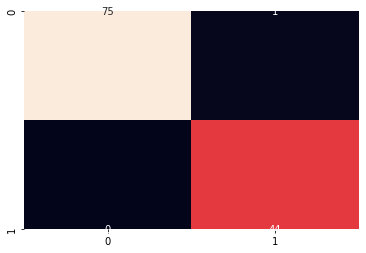

In [86]:
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, cbar=False)

In [154]:
# 98% accurate
log_reg.score(X_test, y_test)

0.9916666666666667

In [155]:
log_reg.score(X_train, y_train)

0.95

In [113]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve, RocCurveDisplay

# Plot ROC and AUC 
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
- When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.

In [ ]:
RocCurveDisplay()

In [115]:
plot_roc_curve(log_reg, X_test, y_test)

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
- ane_no
- ane_yes
- appet_good
- appet_poor
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 23 features, but LogisticRegression is expecting 10 features as input.

# Feature Importance Analysis 
- Look at Coefficients
- Recursive Feature Elimination

## Look at feature importance based on coefficients 

In [92]:
log_reg.feature_names_in_

array(['bp', 'rc', 'wc', 'pcv', 'sc', 'sod', 'pot', 'hemo', 'age',
       'rbc_abnormal', 'rbc_normal', 'cad_no', 'cad_yes', 'appet_good',
       'appet_poor', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'ane_no',
       'ane_yes', 'pe_no', 'pe_yes'], dtype=object)

In [94]:
lr_feature_importance = dict(zip(log_reg.feature_names_in_, log_reg.coef_[0]))
lr_feature_importance

{'bp': -0.07694316951008774,
 'rc': 0.8731946910631976,
 'wc': -0.00013465224573130143,
 'pcv': 0.01439632809708126,
 'sc': -1.2839291619178335,
 'sod': -0.06806714559210122,
 'pot': -0.6078666887983619,
 'hemo': 0.8811588853733023,
 'age': 0.016763740412689503,
 'rbc_abnormal': -0.9188383312908123,
 'rbc_normal': 0.6954508699722942,
 'cad_no': -0.0643005354665807,
 'cad_yes': -0.1590869259587011,
 'appet_good': 0.458386230456837,
 'appet_poor': -0.6817736921738444,
 'htn_no': 0.8882304717337821,
 'htn_yes': -1.1116179325878304,
 'dm_no': 1.213122187308529,
 'dm_yes': -1.4365096490246692,
 'ane_no': 0.014126699613467682,
 'ane_yes': -0.23751416100644257,
 'pe_no': 0.8460441494027426,
 'pe_yes': -1.0694316112116005}

In [95]:
marklist = sorted(lr_feature_importance.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)

In [96]:
sortdict

{'dm_no': 1.213122187308529,
 'htn_no': 0.8882304717337821,
 'hemo': 0.8811588853733023,
 'rc': 0.8731946910631976,
 'pe_no': 0.8460441494027426,
 'rbc_normal': 0.6954508699722942,
 'appet_good': 0.458386230456837,
 'age': 0.016763740412689503,
 'pcv': 0.01439632809708126,
 'ane_no': 0.014126699613467682,
 'wc': -0.00013465224573130143,
 'cad_no': -0.0643005354665807,
 'sod': -0.06806714559210122,
 'bp': -0.07694316951008774,
 'cad_yes': -0.1590869259587011,
 'ane_yes': -0.23751416100644257,
 'pot': -0.6078666887983619,
 'appet_poor': -0.6817736921738444,
 'rbc_abnormal': -0.9188383312908123,
 'pe_yes': -1.0694316112116005,
 'htn_yes': -1.1116179325878304,
 'sc': -1.2839291619178335,
 'dm_yes': -1.4365096490246692}

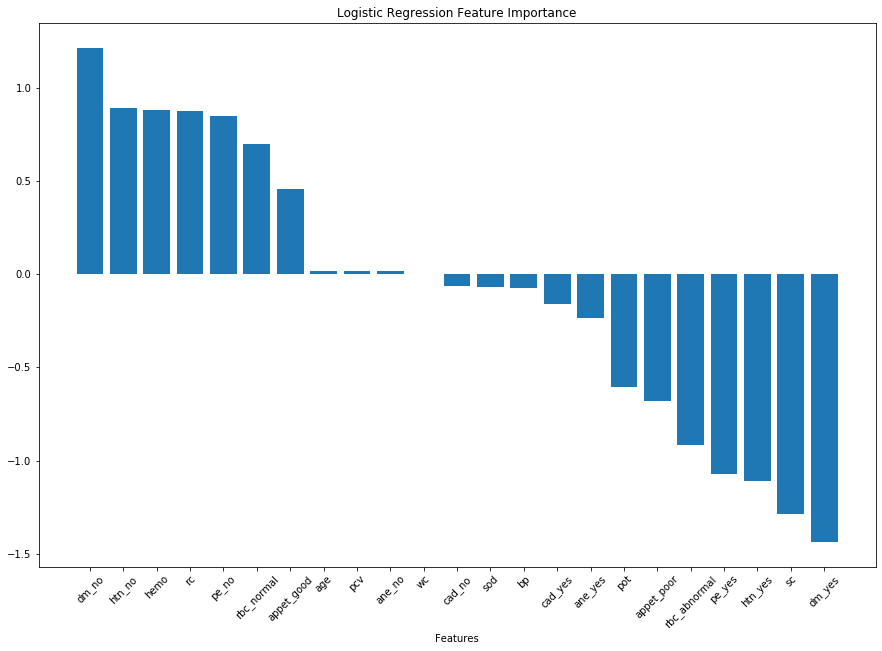

In [97]:
plt.figure(figsize=(15,10))
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Features')
plt.bar(sortdict.keys(), sortdict.values())
plt.xticks(rotation = 45)
plt.show()


# Recursive Feature Elimination

In [99]:
from sklearn.feature_selection import RFE

In [100]:
feature_selector = RFE(log_reg, n_features_to_select=10)

In [101]:
# fit features
feature_selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

# Train Logistic Regression on top 10 features and see if it improves model score 
- ideally all of this would be in a sklearn pipeline that would do this automatically
- You can also use gridsearch in the pipelne
    - see if l1 penalty would remove the need to do any feature selection since that would make less important coefficients zero

In [102]:
X_train.columns[feature_selector.support_]

Index(['rc', 'sc', 'hemo', 'rbc_abnormal', 'rbc_normal', 'htn_no', 'htn_yes',
       'dm_no', 'dm_yes', 'pe_no'],
      dtype='object')

In [103]:
log_reg.fit(X_train[X_train.columns[feature_selector.support_]], y_train)

LogisticRegression(max_iter=1000)

In [104]:
lr_predictions_rfe = log_reg.predict(X_test[X_train.columns[feature_selector.support_]])

In [105]:
log_reg.score(X_test[X_train.columns[feature_selector.support_]], y_test)

1.0

In [106]:
# precision, recall and f1 score is 1
print(classification_report(y_test, lr_predictions_rfe))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



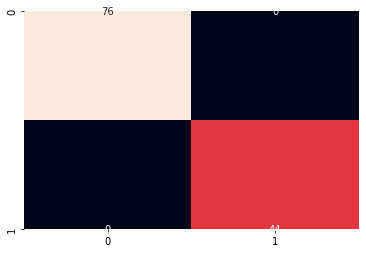

In [107]:
# perfectly predicted ckd
sns.heatmap(confusion_matrix(y_test, lr_predictions_rfe), annot=True, cbar=False)

C:\Users\charlesd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


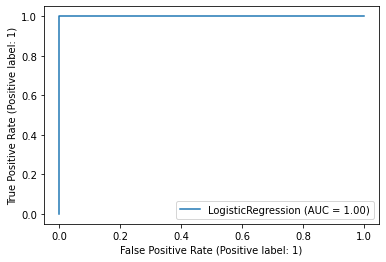

In [403]:
plot_roc_curve(lr, X_test[X_train.columns[feature_selector.support_]], y_test)

# Decision Tree 

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dt = DecisionTreeClassifier()

In [267]:
dt.fit(X_train, y_train)

ValueError: could not convert string to float: 'normal'

In [257]:
dt_predictions = dt.predict(X_test)

Text(0.5, 1, 'Decision Tree Confusion Matrix')

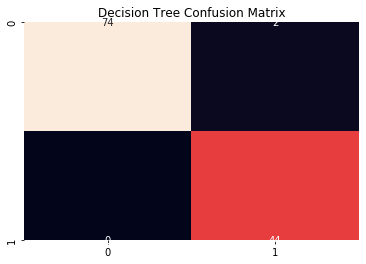

In [249]:
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, cbar=False)
plt.title('Decision Tree Confusion Matrix')

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


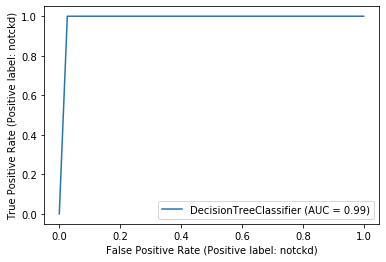

In [250]:
plot_roc_curve(dt, X_test, y_test)

In [117]:
dt.feature_importances_

array([0.01444992, 0.01012073, 0.02754189, 0.        , 0.05564381,
       0.03668448, 0.01012073, 0.68071111, 0.01908209, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05207921, 0.        , 0.        , 0.09356603, 0.        ,
       0.        , 0.        , 0.        ])

In [118]:
dt.feature_names_in_

array(['bp', 'rc', 'wc', 'pcv', 'sc', 'sod', 'pot', 'hemo', 'age',
       'rbc_abnormal', 'rbc_normal', 'cad_no', 'cad_yes', 'appet_good',
       'appet_poor', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'ane_no',
       'ane_yes', 'pe_no', 'pe_yes'], dtype=object)

In [119]:
dict(zip(dt.feature_names_in_, dt.feature_importances_))

{'bp': 0.014449922616535833,
 'rc': 0.0101207258006217,
 'wc': 0.02754188806410113,
 'pcv': 0.0,
 'sc': 0.05564380740304593,
 'sod': 0.03668448343310516,
 'pot': 0.0101207258006217,
 'hemo': 0.6807111137250194,
 'age': 0.01908209458068548,
 'rbc_abnormal': 0.0,
 'rbc_normal': 0.0,
 'cad_no': 0.0,
 'cad_yes': 0.0,
 'appet_good': 0.0,
 'appet_poor': 0.0,
 'htn_no': 0.052079206521209426,
 'htn_yes': 0.0,
 'dm_no': 0.0,
 'dm_yes': 0.09356603205505425,
 'ane_no': 0.0,
 'ane_yes': 0.0,
 'pe_no': 0.0,
 'pe_yes': 0.0}

In [251]:
dt.score(X_test, y_test)

0.9833333333333333

In [121]:
from sklearn import tree

In [122]:
text_representation = tree.export_text(dt, feature_names=dt.feature_names_in_.tolist())
print(text_representation)

|--- hemo <= 12.95
|   |--- sc <= 1.15
|   |   |--- sod <= 142.50
|   |   |   |--- sc <= 1.05
|   |   |   |   |--- sod <= 139.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sod >  139.50
|   |   |   |   |   |--- sc <= 0.85
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- sc >  0.85
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- sc >  1.05
|   |   |   |   |--- pot <= 3.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pot >  3.80
|   |   |   |   |   |--- class: 1
|   |   |--- sod >  142.50
|   |   |   |--- class: 1
|   |--- sc >  1.15
|   |   |--- class: 0
|--- hemo >  12.95
|   |--- dm_yes <= 0.50
|   |   |--- htn_no <= 0.50
|   |   |   |--- class: 0
|   |   |--- htn_no >  0.50
|   |   |   |--- wc <= 11750.00
|   |   |   |   |--- age <= 11.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  11.50
|   |   |   |   |   |--- bp <= 85.00
|   |   |   |   |   |   |--- sc <= 7.29
|   |   |   |   |   |   |   |--- age <= 18.50
|   |   |   |  

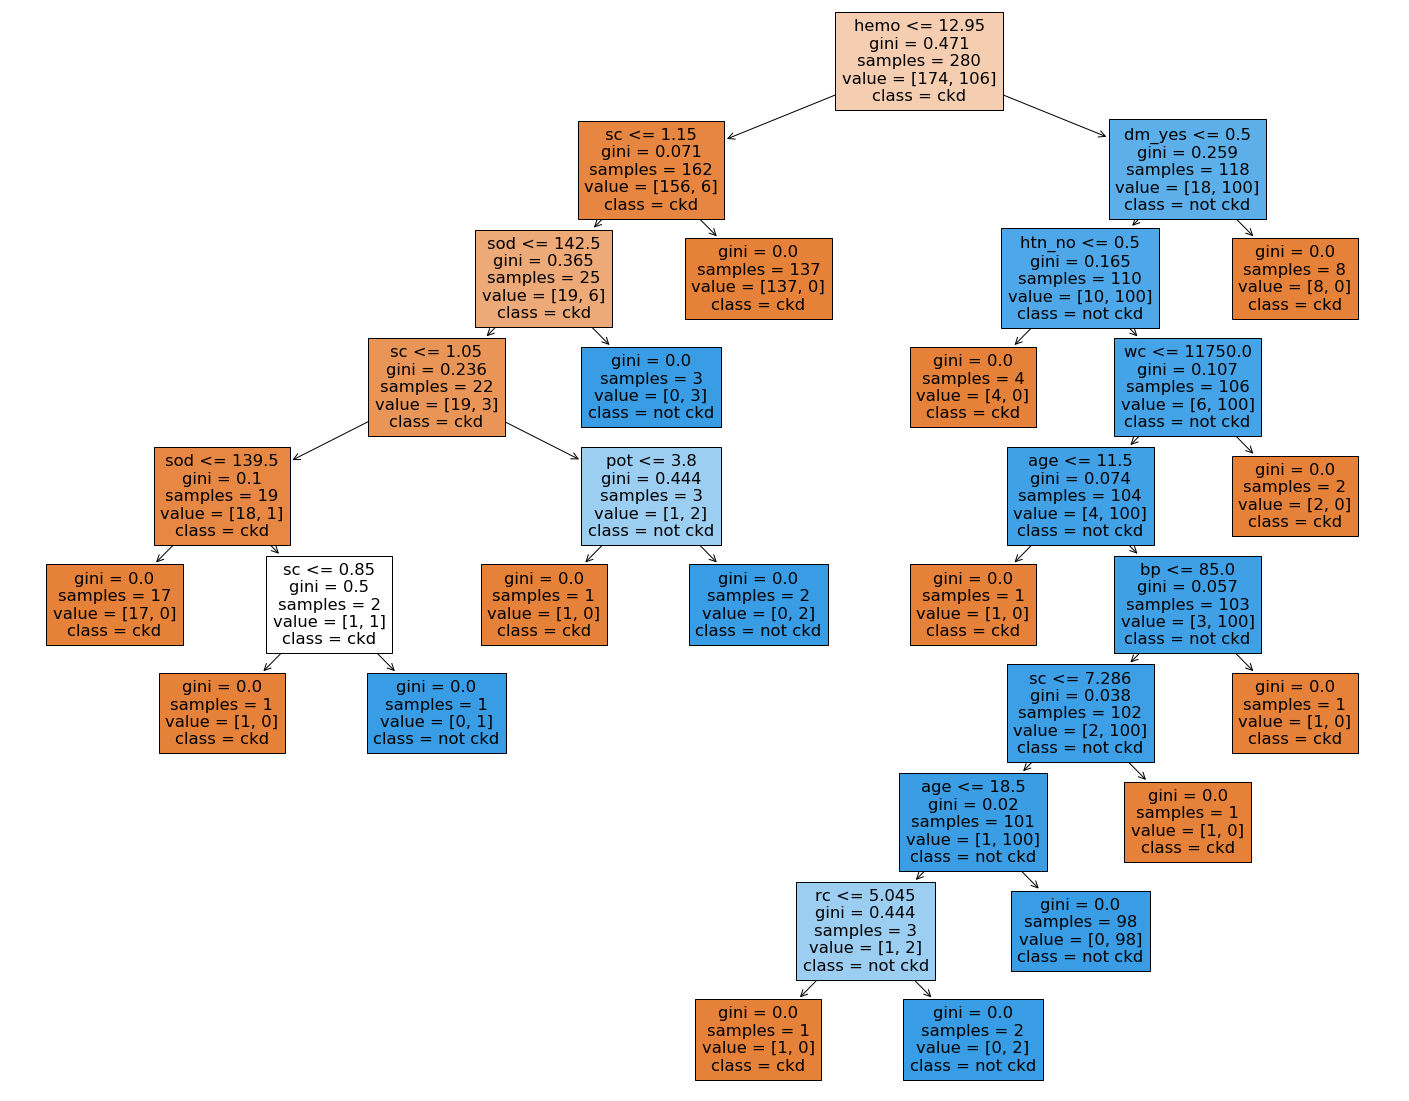

In [123]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=dt.feature_names_in_,  
                   class_names=['ckd','not ckd'],
                   filled=True)

In [254]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



# Neural Network
- output activation layer should output values between 0 and 1 or 0 to 1000 (sigmoid)

In [124]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [252]:
X.shape[1]

16

In [125]:
model = Sequential()

In [126]:
# add layers
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

In [127]:
(model
 .compile(loss='binary_crossentropy', 
          optimizer='sgd',
          metrics=['accuracy'])
)

In [128]:
model.fit(X_train, y_train, epochs=40, batch_size=10, verbose=0)

In [129]:
_, accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6333


In [284]:
accuracy

0.6333333253860474

In [262]:
nn_predictions = model.predict(X_test)

In [264]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [130]:
# export model for deploying to AWS or Heroku
import joblib

In [259]:
joblib.dump(dt, 'decision_tree_model_0429.pkl', compress=3)

['decision_tree_model_0429.pkl']

In [258]:
dt_predictions

array(['ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd',
       'not

In [219]:
y_test

209       ckd
280    notckd
33        ckd
210       ckd
93        ckd
        ...  
60        ckd
79        ckd
285    notckd
305    notckd
281    notckd
Name: classification, Length: 120, dtype: object

In [215]:
kidney_training_data

,bp,rbc,rc,wc,pcv,cad,appet,sc,sod,pot,hemo,htn,dm,ane,age,pe
0,80.0,normal,5.20,7800.0,44.0,no,good,1.2,137.528754,4.627244,15.4,yes,yes,no,48.0,no
1,50.0,normal,4.69,6000.0,38.0,no,good,0.8,137.528754,4.627244,11.3,no,no,no,7.0,no
2,80.0,normal,4.69,7500.0,31.0,no,poor,1.8,137.528754,4.627244,9.6,no,yes,yes,62.0,no
3,70.0,normal,3.90,6700.0,32.0,no,poor,3.8,111.000000,2.500000,11.2,yes,no,yes,48.0,yes
4,80.0,normal,4.60,7300.0,35.0,no,good,1.4,137.528754,4.627244,11.6,no,no,no,51.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,normal,4.90,6700.0,47.0,no,good,0.5,150.000000,4.900000,15.7,no,no,no,55.0,no
396,70.0,normal,6.20,7800.0,54.0,no,good,1.2,141.000000,3.500000,16.5,no,no,no,42.0,no
397,80.0,normal,5.40,6600.0,49.0,no,good,0.6,137.000000,4.400000,15.8,no,no,no,12.0,no
398,60.0,normal,5.90,7200.0,51.0,no,good,1.0,135.000000,4.900000,14.2,no,no,no,17.0,no


In [216]:
kidney_disease_medical_data['classification']

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object